In [19]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [20]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("/Users/archanakale/Desktop/credit-risk-classification/Resources/lending_data.csv")

# Review the DataFrame
lending_data = pd.read_csv(file_path)
lending_data.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [21]:
# Separate the data into labels and features

# Create the labels set (y) from the “loan_status” column
y = lending_data['loan_status']

# Create the features (X) DataFrame from the remaining columns
X = lending_data.drop(columns=['loan_status'])


In [22]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data["loan_status"]

# Review the y variable Series
y[:5]


0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [23]:
# Review the X variable DataFrame
X.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [25]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [26]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [27]:
# Make a prediction using the testing data
y_pred = model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

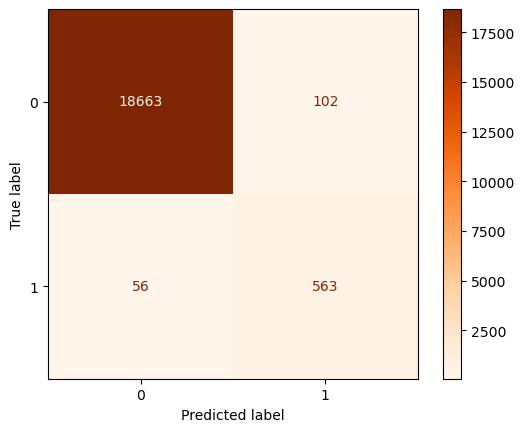

In [34]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

from sklearn.metrics import ConfusionMatrixDisplay
# Displaying results
cm = ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot(cmap='Oranges')

In [35]:
# Print the classification report for the model
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.


How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

The logistic regression model’s performance can be evaluated using several metrics. Let’s break it down:

Accuracy Score: The accuracy score measures the overall correctness of the model’s predictions. It’s the ratio of correctly predicted instances (both healthy and high-risk loans) to the total number of instances. In your case, the accuracy is approximately 99%, which indicates that the model performs well overall.
Precision Score: Precision represents the proportion of true positive predictions (correctly identified high-risk loans) out of all positive predictions (both true positives and false positives). A precision score of 0.85 means that when the model predicts a loan as high-risk, it’s correct 85% of the time.
Recall (Sensitivity) Score: Recall measures the proportion of true positive predictions out of all actual positive instances (high-risk loans). A recall score of 0.91 indicates that the model identifies 91% of the actual high-risk loans.
F1-Score: The F1-score combines precision and recall into a single metric. It balances the trade-off between precision and recall. An F1-score of 0.88 suggests a good balance between correctly identifying high-risk loans and minimizing false positives.
In summary, the logistic regression model performs well in predicting both healthy (0) and high-risk (1) loans, with high accuracy and reasonable precision and recall12. Keep in mind that the choice of threshold (probability cutoff) affects the model’s behavior. Adjusting this threshold can impact the trade-off between precision and recall3. Consider the specific context and business requirements when interpreting these results.


---